## The original image, and its associated caption (decoded from token IDs).

In [6]:
import sys
import os
sys.path.append(os.path.abspath(".."))



In [22]:
import torch
import matplotlib.pyplot as plt
import random
import torchvision.transforms.functional as F
from src.dataset import ImageCaptionDataset, my_transforms, build_vocab_from_captions, MyTokenizer

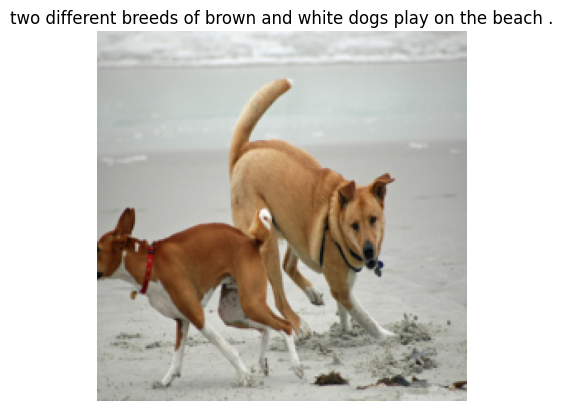

In [23]:


# Build vocab and dataset
import os
BASE_DIR = os.path.abspath("..")
CSV_PATH = os.path.join(BASE_DIR, "data", "Captions", "captions.txt")
IMG_PATH = os.path.join(BASE_DIR, "data", "Images")

vocab = build_vocab_from_captions(CSV_PATH)
my_tokenizer = MyTokenizer(vocab)
dataset = ImageCaptionDataset(
    csv_file=CSV_PATH,
    img_folder=IMG_PATH,
    tokenizer=my_tokenizer,
    transform=my_transforms
)


# Reverse vocab for decoding ids back to words
idx2word = {idx: word for word, idx in vocab['word2idx'].items()}

def decode_caption(caption_tensor):
    tokens = []
    for idx in caption_tensor:
        word = idx2word.get(idx.item(), "<unk>")
        if word == '<eos>':
            break
        if word != '<sos>' and word != '<pad>':
            tokens.append(word)
    return ' '.join(tokens)

# Pick an index
idx = 100  # or any random number in range(len(dataset))
image, caption_tensor = dataset[idx]

# Denormalize for displaying
mean = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
image_display = image * std + mean  # unnormalize
image_display = F.to_pil_image(image_display)

# Show image and caption
plt.imshow(image_display)
plt.axis('off')
plt.title(decode_caption(caption_tensor))
plt.show()


### Grid of random samples

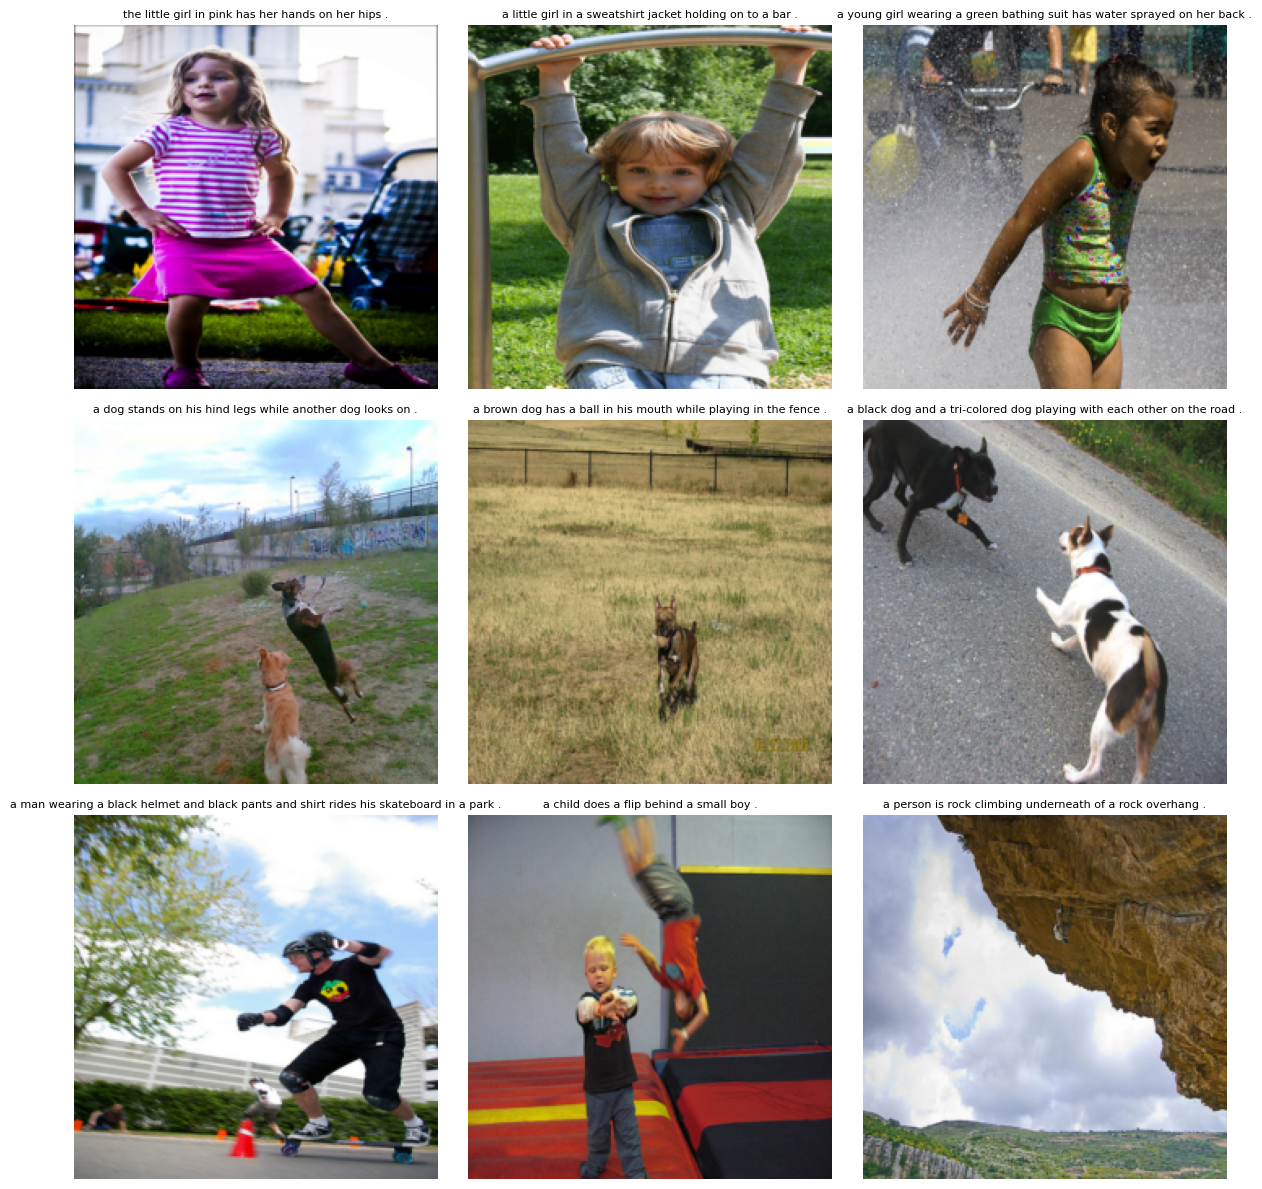

In [27]:
plt.figure(figsize=(12,12))
for i in range(9):
    idx = random.randint(0, len(dataset) - 1)
    image, caption_tensor = dataset[idx]
    image_display = image * std + mean
    image_display = F.to_pil_image(image_display)
    plt.subplot(3,3,i+1)
    plt.imshow(image_display)
    plt.axis('off')
    plt.title(decode_caption(caption_tensor), fontsize=8)
plt.tight_layout()
plt.show()


###  Plot  token frequency (EDA on vocab)

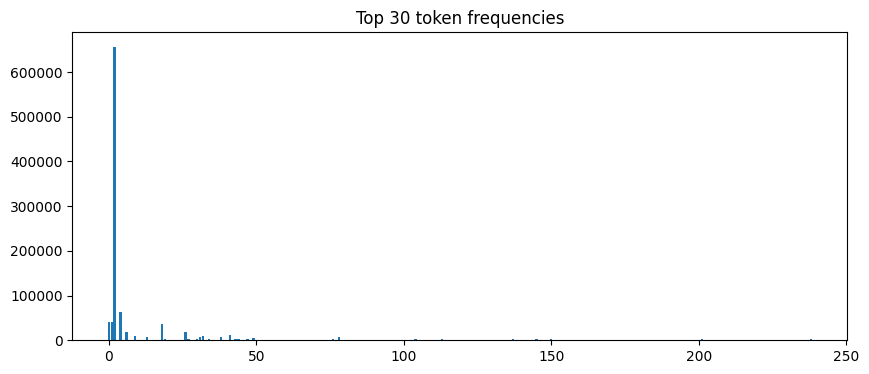

In [28]:
import collections
import matplotlib.pyplot as plt

counter = collections.Counter()
for idx in range(len(dataset)):
    _, caption_tensor = dataset[idx]
    for token_id in caption_tensor:
        counter[token_id.item()] += 1

plt.figure(figsize=(10,4))
plt.bar(*zip(*counter.most_common(30)))
plt.title("Top 30 token frequencies")
plt.show()


Text(0.5, 1.0, 'a girl dressed in black and white with mime makeup stands in the middle of a street with a white umbrella and black top hat in her hand')

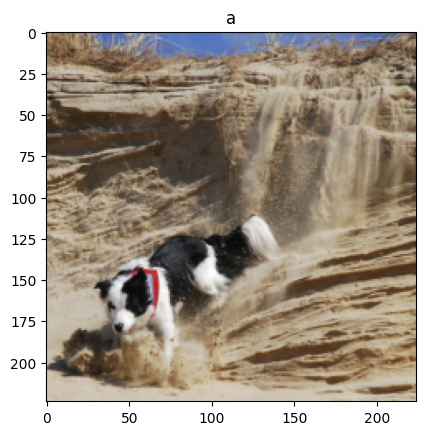

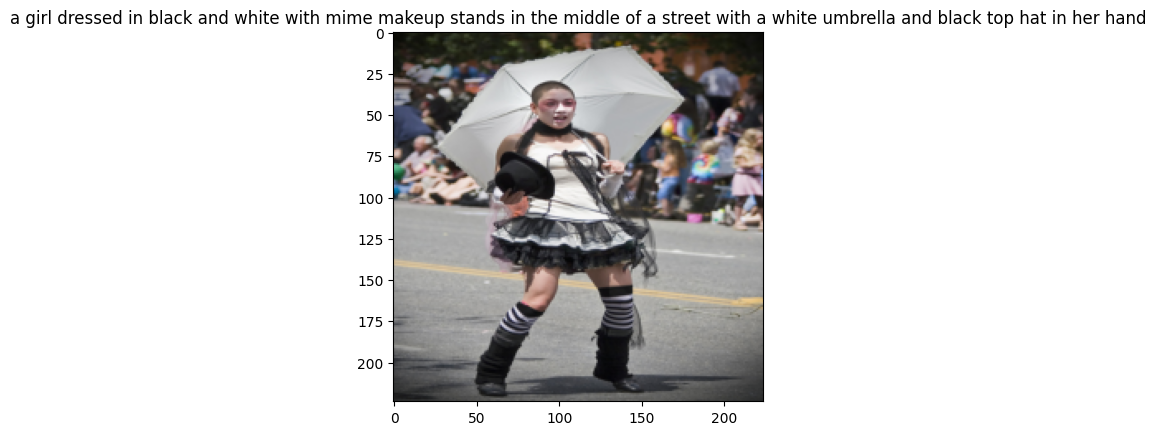

In [29]:
lengths = [ (idx, (caption_tensor != 2).sum().item()) for idx, (image, caption_tensor) in enumerate(dataset)]
lengths.sort(key=lambda x: x[1])

# shortest caption
short_idx, _ = lengths[0]
image, cap = dataset[short_idx]
plt.imshow(F.to_pil_image(image * std + mean))
plt.title(decode_caption(cap))

# longest caption
long_idx, _ = lengths[-1]
image, cap = dataset[long_idx]
plt.figure()
plt.imshow(F.to_pil_image(image * std + mean))
plt.title(decode_caption(cap))

